# Polynomial Regression

We will be investigating the use of Polynomial Regression on the function y = x3. We want to add some randomness to x3, so we will add a fraction of a random value selected from a normal distribution with a standard deviation of 1 centered around 0: 

y = x**3 + 0.5 * np.random.normal(0,1,1)

In [1]:
#importing modules required for the program
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score, mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn import linear_model

In [2]:
#fucntion for adding the randomness
def polynomialRegression(x):
    return (x**3+0.5*np.random.normal(0,1,1))

vectorizeFunc = np.vectorize(polynomialRegression)

#### Test Points

Make a list of 15 random points between -2 and 2 (using a uniform distribution). Pass this list into the function described above to get a set of x and y coordinates. Display the (x,y) coordinates as a data frame.

In [3]:
x = np.random.uniform(-2,2,15) #input values
y = vectorizeFunc(x) #vectorize the values

In [4]:
dataframe = pd.DataFrame(list(zip(x,y)),columns=['x','y']) #creating dataframe
dataframe

,x,y
0,-1.368644,-2.406101
1,-1.630308,-4.142348
2,-1.687718,-4.785661
3,-1.741707,-5.554860
4,0.783381,0.939432
5,0.395271,-0.487913
6,1.444800,2.720038
7,-0.080733,-0.207550
8,-1.688493,-5.036546
9,0.692644,0.114236


#### Create Graphs

Now, create scatter plots of the (x,y) coordinates and a degree 1 (linear) regression model, degree 2 (quadratic) regression model, degree 3 (cubic) regression model, and degree 4

There should be 4 separate graphs for this step each clearly labeled and annotated.

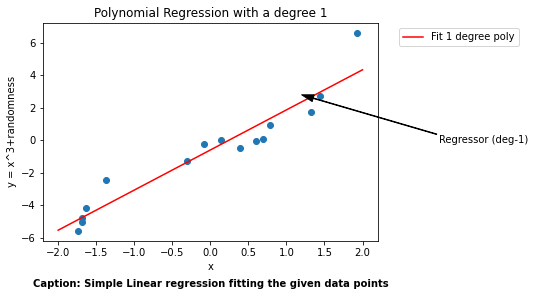

In [16]:
# scatter plot for linear regression

x_new = np.linspace(-2,2)
model1 = Pipeline([('poly', PolynomialFeatures(degree=1)),('linear', linear_model.LinearRegression())])
model1 = model1.fit(x[:,np.newaxis], y[:,np.newaxis])
y_new1 = model1.predict(x_new[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_new, y_new1, 'r', label="Fit "+str(1)+" degree poly")
plt.annotate('Regressor (deg-1)', xy=(1.2,2.8), xytext=(3, -0.15),arrowprops=dict(facecolor='black',width=0.5, headwidth=7),)
plt.xlabel('x')
plt.ylabel('y = x^3+randomness')
plt.title('Polynomial Regression with a degree 1')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.text(0,-9,"Caption: Simple Linear regression fitting the given data points",ha="center",weight="bold")
plt.show()

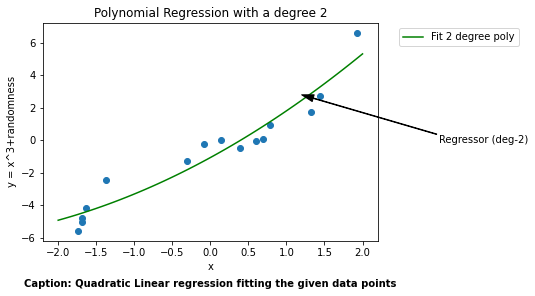

In [17]:
# scatter plot for quadratic regression

model2 = Pipeline([('poly', PolynomialFeatures(degree=2)),('quadratic', linear_model.LinearRegression())])
model2 = model2.fit(x[:,np.newaxis], y[:,np.newaxis])
y_new2 = model2.predict(x_new[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_new, y_new2, 'g', label="Fit "+str(2)+" degree poly")
plt.annotate('Regressor (deg-2)', xy=(1.2,2.8), xytext=(3, -0.15),arrowprops=dict(facecolor='black',width=0.5, headwidth=7),)
plt.xlabel('x')
plt.ylabel('y = x^3+randomness')
plt.title('Polynomial Regression with a degree 2')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.text(0,-9,"Caption: Quadratic Linear regression fitting the given data points",ha="center",weight="bold")
plt.show()

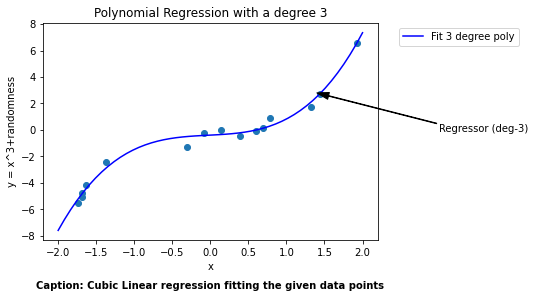

In [18]:
# scatter plot for cubic regression

model3 = Pipeline([('poly', PolynomialFeatures(degree=3)),('cubic', linear_model.LinearRegression())])
model3 = model3.fit(x[:,np.newaxis], y[:,np.newaxis])
y_new3 = model3.predict(x_new[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_new, y_new3, 'b', label="Fit "+str(3)+" degree poly")
plt.annotate('Regressor (deg-3)', xy=(1.4,2.8), xytext=(3, -0.15),arrowprops=dict(facecolor='black',width=0.5, headwidth=7),)
plt.xlabel('x')
plt.ylabel('y = x^3+randomness')
plt.title('Polynomial Regression with a degree 3')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.text(0,-12,"Caption: Cubic Linear regression fitting the given data points",ha="center",weight="bold")
plt.show()

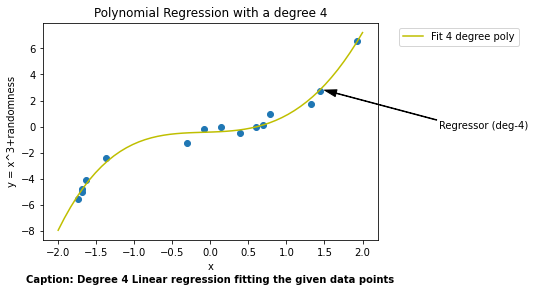

In [19]:
# scatter plot for degree 4 regression

model4 = Pipeline([('poly', PolynomialFeatures(degree=4)),('degree 4', linear_model.LinearRegression())])
model4 = model4.fit(x[:,np.newaxis], y[:,np.newaxis])
y_new4 = model4.predict(x_new[:,np.newaxis])

plt.scatter(x, y)
plt.plot(x_new, y_new4, 'y', label="Fit "+str(4)+" degree poly")
plt.annotate('Regressor (deg-4)', xy=(1.5,2.8), xytext=(3, -0.15),arrowprops=dict(facecolor='black',width=0.5, headwidth=7),)
plt.xlabel('x')
plt.ylabel('y = x^3+randomness')
plt.title('Polynomial Regression with a degree 4')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.text(0,-12,"Caption: Degree 4 Linear regression fitting the given data points",ha="center",weight="bold")
plt.show()

#### Combine Graphs

Next, create a single graph that contains all 4 regression models from the last step as well as the (x,y) coordinates. Make sure there is a useful legend as well.

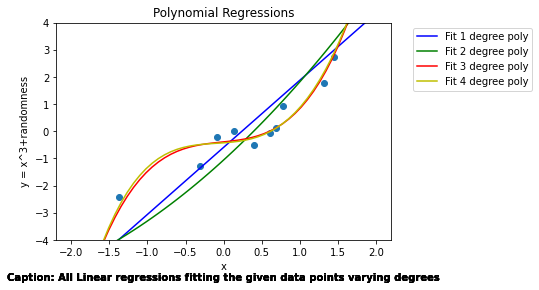

In [9]:
plot_config =['b','g','r','y']
plot_degree =[1,2,3,4]

i=0
plt.scatter(x, y)

#looping for creating all plots one by one inside a single plot
for degree in plot_degree:
    model = Pipeline([('poly', PolynomialFeatures(degree=degree)), ('linear', linear_model.LinearRegression())])
    model = model.fit(x[:, np.newaxis], y[:, np.newaxis])
    predict_model = model.predict(x_new[:,np.newaxis])
    
    plt.plot(x_new, predict_model, plot_config[i], label="Fit "+str(degree)+ " degree poly")
    plt.xlabel('x')
    plt.ylabel('y = x^3+randomness')
    plt.title('Polynomial Regressions')
    plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
    plt.text(0,-5.5,"Caption: All Linear regressions fitting the given data points varying degrees",ha="center",weight="bold")
    plt.ylim(-4,4.)
    i=i+1
    
plt.show()

#### Test the Models

We want to see which model was the best predictor for our function. Which one do you think would be the best? To figure this out, create a set of 100 x coordinates randomly generated from a uniform distribution between -2 and 2. 

Then generate the corresponding y coordinates by passing in the x’s to the x3 + (degree of randomness) function from earlier. Display the first few (x,y) coordinates to make sure they are what you expect.

In [10]:
x_test = np.random.uniform(-2,2,100) #generating test data
y_test = vectorizeFunc(x_test)

dataframetest = pd.DataFrame(list(zip(x_test,y_test)),columns=['x_test','y_test'])
dataframetest

,x_test,y_test
0,0.574534,1.156082
1,0.549267,0.683223
2,-1.085449,-0.945611
3,0.488099,-0.571973
4,-0.934986,-0.236149
...,...,...
95,0.527694,0.683717
96,-1.970755,-7.889015
97,1.532231,3.740569
98,-1.604610,-4.049354


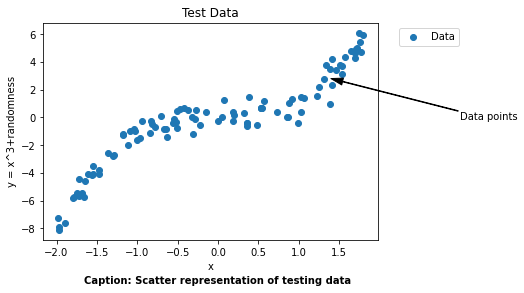

In [11]:
#representing the test data in scatter plot
plt.scatter(x_test, y_test,label='Data')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.annotate('Data points', xy=(1.4,2.8), xytext=(3, -0.15),arrowprops=dict(facecolor='black',width=0.5, headwidth=7),)
plt.xlabel('x')
plt.ylabel('y = x^3+randomness')
plt.title('Test Data')
plt.text(0,-12,"Caption: Scatter representation of testing data",ha="center",weight="bold")
plt.show()

#### The Results

To find the best model, we compare the root mean square error for each polynomial regression model. The model with the lowest error is the best!

In [12]:
# calculating the loss with mae and goodness of fit for polynomial regression with degree 1 or model 1
y_pred1 = model1.predict(x_test[:,np.newaxis])
m1 = mean_squared_error(y_test, y_pred1, squared=False)
r2_1 = r2_score(y_test, y_pred1)
print("The roor mean square error (rmse) for polynomial regression with degree 1 is ",m1)
print("The R^2 for polynomial regression with degree 1 is ",r2_1)

The roor mean square error (rmse) for polynomial regression with degree 1 is  1.368797598352853
The R^2 for polynomial regression with degree 1 is  0.8109611120951409


In [13]:
# calculating the loss with mae and goodness of fit for polynomial regression with degree 2 or model 2
y_pred2 = model2.predict(x_test[:,np.newaxis])
m2 = mean_squared_error(y_test, y_pred2, squared=False)
r2_2 = r2_score(y_test, y_pred2)
print("The roor mean square error (rmse) for polynomial regression with degree 2 is ",m2)
print("The R^2 for polynomial regression with degree 2 is ",r2_2)

The roor mean square error (rmse) for polynomial regression with degree 2 is  1.5201504778858697
The R^2 for polynomial regression with degree 2 is  0.7668444029748054


In [14]:
# calculating the loss with mae and goodness of fit for polynomial regression with degree 3 or model 3
y_pred3 = model3.predict(x_test[:,np.newaxis])
m3 = mean_squared_error(y_test, y_pred3, squared=False)
r2_3 = r2_score(y_test, y_pred3)
print("The roor mean square error (rmse) for polynomial regression with degree 3 is ",m3)
print("The R^2 for polynomial regression with degree 3 is ",r2_3)

The roor mean square error (rmse) for polynomial regression with degree 3 is  0.691886357775216
The R^2 for polynomial regression with degree 3 is  0.9517005461806298


In [15]:
# calculating the loss with mae and goodness of fit for polynomial regression with degree 4 or model 4
y_pred4 = model4.predict(x_test[:,np.newaxis])
m4 = mean_squared_error(y_test, y_pred4, squared=False)
r2_4 = r2_score(y_test, y_pred4)
print("The roor mean square error (rmse) for polynomial regression with degree 4 is ",m4)
print("The R^2 for polynomial regression with degree 4 is ",r2_4)

The roor mean square error (rmse) for polynomial regression with degree 4 is  0.6710486466561276
The R^2 for polynomial regression with degree 4 is  0.9545660292271646


### From the results section, we can see that the cubic regression or polynomial regression with a degree 3 is the best model as it is achieving lowest error rate (rmse) and also explaning better variance underlying the data (r^2).